## Week 1: Exploratory data analysis

## Importing and reading csv's

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


## Data cleaning

Hieronder voeg ik de twee datasets: steps.csv en survey.csv samen op basis van de kolom id

In [3]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Removing NaN values

Om alle NaN values eruit te halen heb ik gebruik gemaakt van de .notna() functie. Ik heb gekozen om dat alleen bij de kolommen education, height en weight te doen i.v.m de volgende opdracht

In [4]:
df = df[df['education'].notna()]
df = df[df['height'].notna()]
df = df[df['weight'].notna()]

### Kolom gemiddelde stappen aanmaken

Hieronder bereken ik met behulp van .iloc en .mean() de gemiddelde stappen per proefpersoon.

In [5]:
df['gemiddelde_stappen']=df.iloc[:, 9:].mean(axis=1)

C:\Users\davel\AppData\Local\Temp\ipykernel_11104\2505614409.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['gemiddelde_stappen']=df.iloc[:, 9:].mean(axis=1)


Hieronder drop ik de onmogelijke waarde van gemiddelde stappen

In [6]:
df.drop(df[df["gemiddelde_stappen"] >= 30000].index, inplace=True)

In [10]:
print(df.head())

   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1   2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2   3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        NaN        NaN        NaN        NaN        NaN        NaN   
4   5        NaN        NaN        NaN        NaN        NaN        NaN   

   26-6-2013  27-6-2013  28-6-2013  ...  13-5-2014         city  gender  \
0     9929.0    12879.0    10541.0  ...        NaN     Bordeaux    Male   
1     4024.0     3926.0    14595.0  ...        NaN        Lille    Male   
2     8185.0     9630.0     8983.0  ...        NaN  Montpellier    Male   
3        NaN        NaN        NaN  ...        NaN         Lyon    Male   
4        NaN        NaN        NaN  ...        NaN  Montpellier  Female   

     age  hh_size  education          education_1  height  weight  \
0  25-34        4          4 

## Exploratory data analysis

Hieronder heb ik een violin plot gemaakt om te kijken hoe de verdeling van gemiddelde stappen eruit ziet.

Text(0, 0.5, 'Aantal proefpersonen')

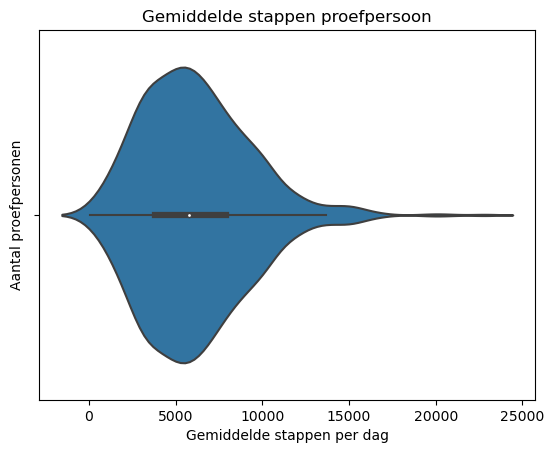

In [8]:
sns.violinplot(data=df, x="gemiddelde_stappen")
plt.title("Gemiddelde stappen proefpersoon")
plt.xlabel("Gemiddelde stappen per dag")
plt.ylabel("Aantal proefpersonen")

In [ ]:
print(df.describe())

Te zien is dat de grafiek redelijk normaal verdeeld is, maar dat er een paar outliers zijn (vooral rechts in de grafiek).

### Twee variabelen in een grafiek

Text(22.28707986111111, 0.5, 'Aantal proefpersonen')

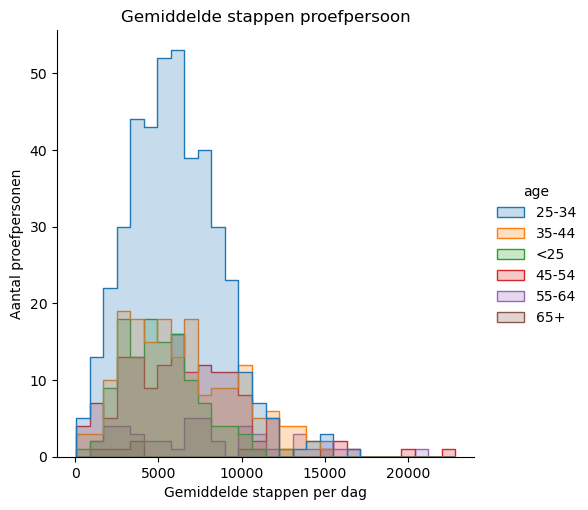

In [9]:
sns.displot(data=df, x="gemiddelde_stappen", hue="age", element="step")
plt.title("Gemiddelde stappen proefpersoon")
plt.xlabel("Gemiddelde stappen per dag")
plt.ylabel("Aantal proefpersonen")


Te zien is dat er veel proefpersonen waren met een leeftijd tussen de 25 en 34. Voor de rest is er geen duidelijke leeftijd groep die gemiddeld de meeste stappen per dag zet. Hieruit kan je concluderen dat leeftijd geen invloed heeft op het gemiddeld aantal stappen dat een proefpersoon per dag zet.